# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

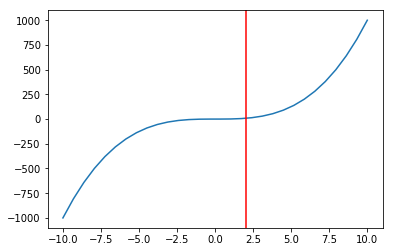

In [2]:
x= np.linspace(-10,10,30)
y= x**3
fig, ax = plt.subplots()
ax.plot(x, y)
plt.axvline(x= 2, color='r')
plt.show()

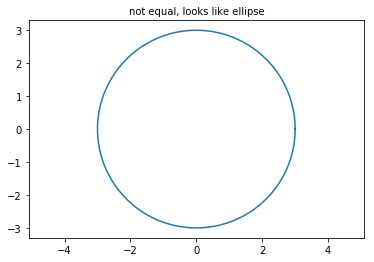

In [21]:
an = np.linspace(0, 2 * np.pi, 100)
#fig, axs = plt.subplots(2, 2)
fig, axs = plt.subplots(1,1)
axs.plot(3 * np.cos(an), 3 * np.sin(an))
#axs.plot(0,an)
axs.set_title('not equal, looks like ellipse', fontsize=10)
axs.axis('equal')
plt.show()

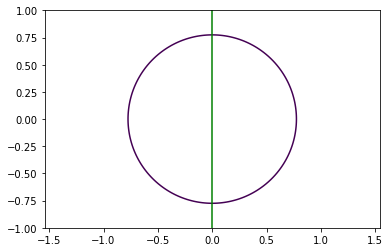

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - 0.6
plt.contour(X,Y,F,[0])
plt.axvline(x=0, color='g')
plt.axis('equal')
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because we get different values of y for same x value but according to function definition, function should map from set of inputs to set of outputs, where no inputs should map to multiple outputs

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 
Because in every relation except relation 2 we have two values of f(x) for a single value of x
Only Relation 2 has different value of f(x) for each different input value

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

for m function -dimension of domain is 3 and dimension of output is also 3
for n function -dimension of domain is 4 and dimension of output is 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

f(x)=(sinx, cosx)

f(x) = (sinx,  x**0.5)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\end{align}

\begin{align}
f(\begin{bmatrix} 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 3\\ 2 \end{bmatrix}
\end{align}

##Transpose matrix of p
\begin{align}
T = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}


##Transpose matrix of q

\begin{align}
T = \begin{bmatrix} 4 & 1 & 2\\ -1 & 2 & 3\\ 5 & 1 &-2 \end{bmatrix}
\end{align}



## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

##via the traditional functions
\begin{align}
f(\begin{bmatrix} 2 \\ 3 \end{bmatrix}) = \begin{bmatrix} 11 \\ 4 \end{bmatrix}
\end{align}

## matrix multiplication:

\begin{align}
\begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}\begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 11 \\ 4 \end{bmatrix}
\end{align}


##For q function

Using **Traditional Functions**:

$
q\left(\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}\right) = \begin{bmatrix} 4 + 1 + 2 \\ -1 + 2 + 3 \\ 5 + 1 -2 \end{bmatrix} = \begin{bmatrix} 7 \\ 4 \\ 4 \end{bmatrix}
$

Using **Matrix-vector** multiplication:

$
\begin{align}
\begin{bmatrix} 4 & 1 & 2\\ -1 & 2 & 3\\ 5 & 1 &-2 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} =\begin{bmatrix} 7 \\ 4 \\ 4 \end{bmatrix}
\end{align}
$

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

When you do the  linear transformation the vectors that don't get knocked off their own span is an eigen vector and by how much it gets  stretched and squished is denoted by scaler eigen value

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

###Following are challenges of working with high high dimensional data:
 - More difficult to explore the data and create visualizations beyond 3d
 - Increased computational workload
 - Diminishing returns to adding features (increased redundancy)-models that have a high feature to observation ratio are more prone to overfitting.
 - Increased sparcity of data- in extremely high dimensional settings all datapoints appear to be more or less equidistant to one another, so  Measures of distance (Euclidean) lose meaning
 

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

###Number of observations (rows in a dataset) as N should be atleast 5 times of the number of parameter(dimension or feature) as P(N = 5P (as a minimum))

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [4]:
df= pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [6]:
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [0]:
#split the data
X= df.iloc[:,0:4]
Y=df.iloc[:,4]


In [8]:
# Principal Component Analysis
from numpy import array
from sklearn.preprocessing import StandardScaler

# create the PCA instance
X_vals = X.values
Y_vals= Y.values
#standaries the dataframe
X = StandardScaler().fit_transform(X)
X= pd.DataFrame(X)

X.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [9]:
from sklearn.decomposition import PCA
# Desired number of principal component
pca = PCA(2)

# fit on data (new variables are called Principal Components (PCs)-new variables that just linear combinations of original variable. )
X_pca = pca.fit_transform(X)
X_pca= pd.DataFrame(X_pca)

# access values and vectors
# because it pass from centre of gravity
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
X_pca.head()


 Eigenvectors: 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

 Eigenvalues: 
 [2.93035378 0.92740362]


,0,1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [10]:
explained_variance=pca.explained_variance_ratio_
explained_variance
#PC1 account for 72.22% variance
#PC2 account for 23.03% variance

array([0.72770452, 0.23030523])

PC1 account for 72.22% variance

PC2 account for 23.03% variance
so We can say 72.22 + 23.03 = 96.25% of the information is captured by the first and second principal components. 

In [11]:
print(X_pca.shape)
print(X.shape)
print(Y.shape)

(150, 2)
(150, 4)
(150,)


In [12]:
X_pca
X_pca['species'] = Y
X_pca.columns=['PC1', "PC2",'species']
X_pca.head()


,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


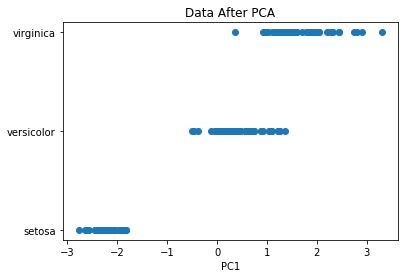

In [13]:
plt.scatter(X_pca['PC1'], X_pca['species'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show()

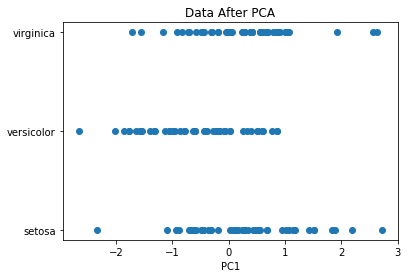

In [14]:
plt.scatter(X_pca['PC2'], X_pca['species'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show()

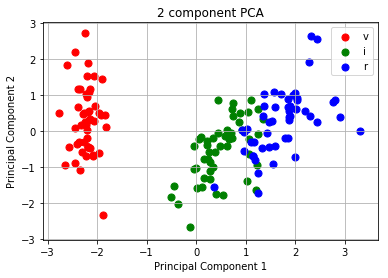

In [15]:
import matplotlib.pyplot as plt
#fig,ax= subplot()
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
species = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for species, color in zip(species,colors):
  indicesToKeep = X_pca['species'] == species
  
  ax.scatter(X_pca.loc[indicesToKeep, 'PC1'],
  X_pca.loc[indicesToKeep, 'PC2'],
  c = color,
  s = 50)
ax.legend(species)
ax.grid()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)

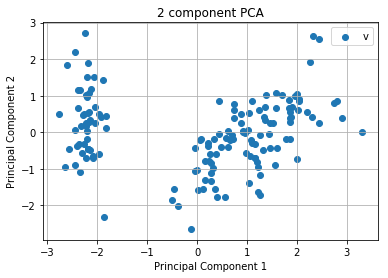

In [16]:
import matplotlib.pyplot as plt
#fig,ax= subplot()
fig, ax = plt.subplots() 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
species = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for species, color in zip(species,colors):
  indicesToKeep = X_pca['species'] == species
  
ax.scatter(X_pca['PC1'],  X_pca['PC2'])
ax.legend(species)
ax.grid()